In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

plt.rc('font', family='serif')

In [124]:
def QualityPlot(x_width, y_width, dpi):
    fig, ax = plt.subplots(1, 1, figsize=(x_width, y_width), dpi=dpi)
    ax.tick_params(axis="y", direction="in", which='major', right=True)
    ax.tick_params(axis="y", direction="in", which='minor', right=True) 
    ax.tick_params(axis="x", direction="in", which='major', top=True)
    ax.tick_params(axis="x", direction="in", which='minor', top=True) 
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    return fig, ax

In [125]:
data = pd.read_csv("observed-solar-cycle-indices.csv")
dt = data.rename(columns={'time-tag': 'date'})
dt['date'] = pd.to_datetime(dt['date'], format='%Y-%m')
dt = dt.set_index('date')
dt['year'] = dt.index.year

dt = dt.rename(columns={'f10.7': 'f10_7'})
dt.head()

,Unnamed: 0,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10_7,smoothed_f10.7,year
date,,,,,,,,
1749-01-01,0,96.7,-1.0,-1.0,-1.0,-1.0,-1.0,1749
1749-02-01,1,104.3,-1.0,-1.0,-1.0,-1.0,-1.0,1749
1749-03-01,2,116.7,-1.0,-1.0,-1.0,-1.0,-1.0,1749
1749-04-01,3,92.8,-1.0,-1.0,-1.0,-1.0,-1.0,1749
1749-05-01,4,141.7,-1.0,-1.0,-1.0,-1.0,-1.0,1749


In [126]:
# Finding when the flux measurements are recorded.
first_flux = dt[(dt['f10_7'] > -1.0)]
print("Date:", first_flux.index[0], "Flux:", first_flux['f10_7'][0])


Date: 2004-10-01 00:00:00 Flux: 137.56


In [127]:
## Subset data for years greater than Sep 2004 to plot f10.7 data.
## Subset ssn up to 100.


data = dt[(dt.index > '2004-09') & (dt.ssn < 100) & (dt.f10_7 < 100)]
data.head()

,Unnamed: 0,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10_7,smoothed_f10.7,year
date,,,,,,,,
2004-12-01,3071,28.9,55.7,34.74,58.7,95.66,-1.0,2004
2005-02-01,3073,43.5,53.2,45.36,56.3,97.30,-1.0,2005
2005-03-01,3074,39.6,52.3,41.00,55.6,90.04,-1.0,2005
2005-04-01,3075,38.7,49.3,41.50,52.5,85.92,100.0,2005
2005-06-01,3077,56.8,44.5,59.77,47.7,94.09,94.8,2005


In [128]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(data['f10_7'][:, np.newaxis], data['ssn'])

xfit = np.linspace(min(data['f10_7']), max(data['f10_7']), len(data['f10_7']))
yfit = model.predict(xfit[:, np.newaxis])

C:\Users\Louie\AppData\Local\Temp\ipykernel_23436\1801194444.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(data['f10_7'][:, np.newaxis], data['ssn'])


In [137]:
from sklearn.metrics import mean_squared_error
mean_square_error = mean_squared_error(data['ssn'], yfit)
print(f"{mean_square_error:.1f}")

trueVal = data['ssn']
pred = yfit

residuals = trueVal - pred

730.7


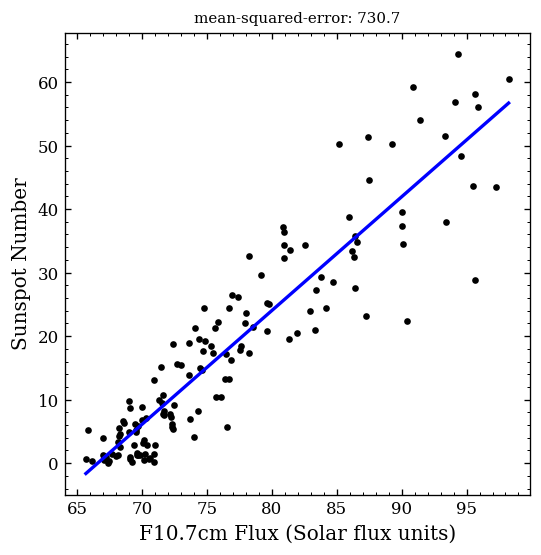

In [136]:
fig, ax = QualityPlot(5, 5, 120)

ax.set_title(f'mean-squared-error: {mean_square_error:.1f}', fontsize=9)
ax.set_xlabel('F10.7cm Flux (Solar flux units)', fontsize=12); 
ax.set_ylabel('Sunspot Number', fontsize=12)

ax.plot(data['f10_7'], data['ssn'], '.k')
ax.plot(xfit, yfit, '-', color='blue', linewidth=2)

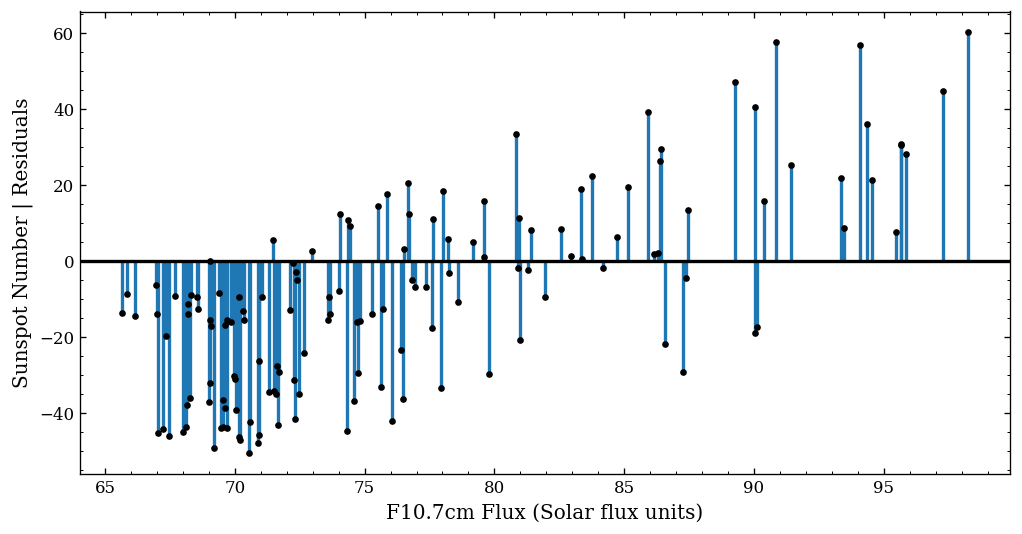

In [131]:
fig, ax = QualityPlot(10, 5, 120)
ax.set_xlabel('F10.7cm Flux (Solar flux units)', fontsize=12); 
ax.set_ylabel('Sunspot Number | Residuals', fontsize=12)

for i, j in zip(data['f10_7'], residuals): ax.vlines(x=i, ymin=0, ymax=j, linewidth=2)
ax.axhline(y=0, linewidth=2, color='k', linestyle='-')

ax.plot(data['f10_7'], residuals, '.k')